In [1]:
from threading import Thread
import numpy as np
import rospy
from sensor_msgs.msg import CompressedImage
import cv2

In [2]:
rospy.init_node("test1")
x = Thread(target=rospy.spin)
x.start()

<IPython.core.display.Javascript object>


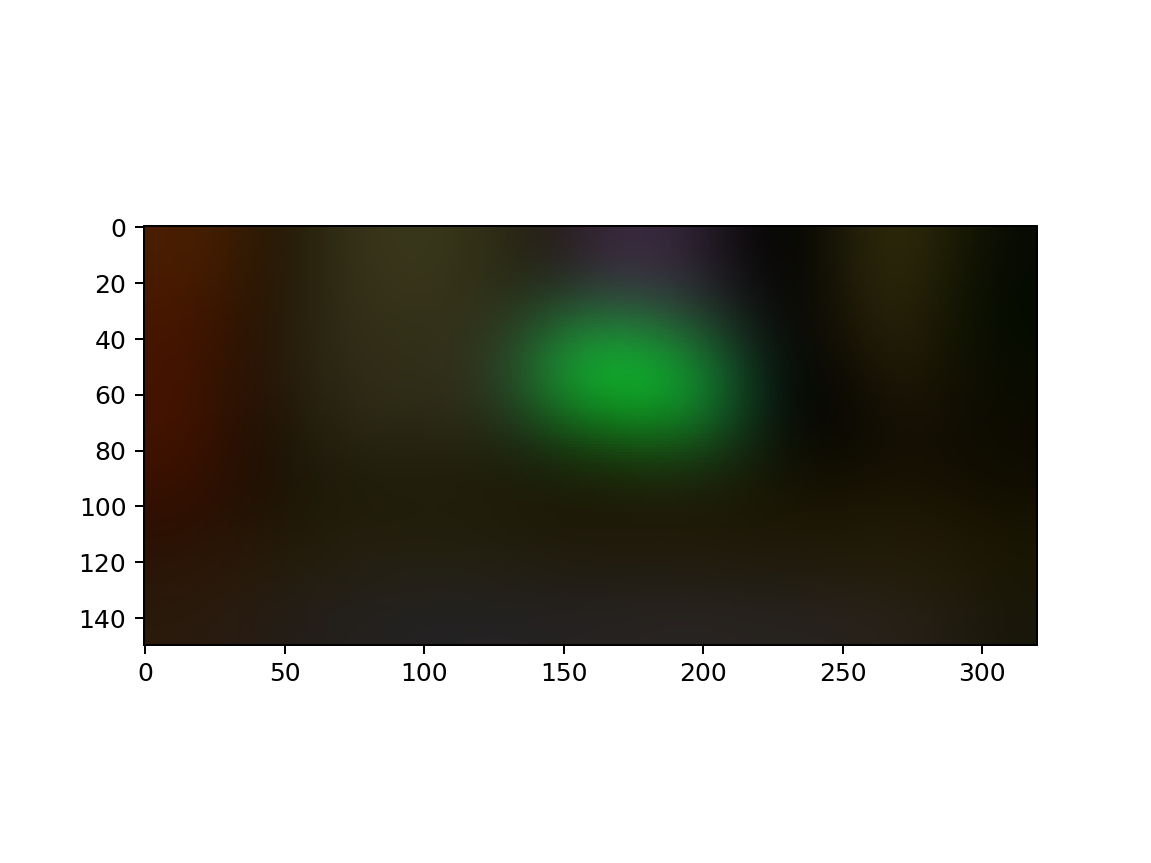

In [82]:
data = rospy.wait_for_message("/theducknight/camera_node/image/compressed",CompressedImage)
np_arr = np.fromstring(data.data, np.uint8)
frame = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
frame = frame[:150,:,:]
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
blurred = cv2.GaussianBlur(img,(101,101),0)
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

plt.imshow(blurred)
plt.show()


In [83]:



mml = cv2.minMaxLoc(hsv[:,:,2])
x = mml[3][0]
y = mml[3][1]
v = mml[1]
rgb = blurred[y][x]

print("#",i,end="\t")
print("x= ",x,end='\t')
print("color= ",rgb, end='\t')
print("v= ",v)

green_threshold = 30
green = rgb[1] > (rgb[0]+green_threshold) and rgb[1] > (rgb[2]+green_threshold)



target = -2*(float(x)/np.shape(hsv)[1] - 0.5)
if v<180:
    target = 0

fwd = 0.1

if not green:
    fwd=0.1

    target=(abs(target)-1)*np.sign(target)
print("target= ",target, end='\t')

steer_gain = 2
offset = (steer_gain*target) 
print("offset= ",offset, end='\t')

lv = trim(fwd*(1-offset))
rv = trim(fwd*(1+offset))

print("sent %f %f"%(lv, rv),end='\t')
if green:
    print("GREEN!")


# 99	x=  164	color=  [ 17 150  38]	v=  237.0
target=  -0.025	offset=  -0.05	sent 0.105000 0.095000	GREEN!


In [67]:
from duckietown_msgs.msg import WheelsCmdStamped
cmd_topic = "/theducknight/wheels_driver_node/wheels_cmd"
cmd_pub = rospy.Publisher(cmd_topic, WheelsCmdStamped, queue_size=1);

In [8]:
now = rospy.Time.now()
msg_wheels_cmd = WheelsCmdStamped()
msg_wheels_cmd.header.stamp.secs = now.secs
msg_wheels_cmd.header.stamp.nsecs = now.nsecs

In [9]:
def trim(value):
    """
    Trims a value to be between some bounds.

    Args:
        value: the value to be trimmed
        low: the minimum bound
        high: the maximum bound

    Returns:
        the trimmed value
    """

    return max(min(value, 1), -1)

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from __future__ import print_function



In [ ]:
msg_wheels_cmd.vel_right = 0
msg_wheels_cmd.vel_left = 0
cmd_pub.publish(msg_wheels_cmd)

In [33]:
rospy.sleep(2.0)
veh_name = 'theducknight'
rospy.set_param('/%s/camera_node/exposure_mode'%veh_name, 'off')
rospy.set_param('/%s/camera_node/res_h'%veh_name, 240)
rospy.set_param('/%s/camera_node/res_w'%veh_name, 320)

In [86]:
try:
    while not button_pressed:
        clear_output(wait=True)
        data = rospy.wait_for_message("/theducknight/camera_node/image/compressed",CompressedImage)
        np_arr = np.fromstring(data.data, np.uint8)
        frame = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
        frame = frame[:150,:,:]
        blurred = cv2.GaussianBlur(frame,(51,51),0)

        img = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
        hsv = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)
        #plt.imshow(blurred)
        #plt.show()

        mml = cv2.minMaxLoc(hsv[:,:,2])
        x = mml[3][0]
        y = mml[3][1]
        v = mml[1]
        rgb = blurred[y][x]

        print("#",i,end="\t")
        print("x= ",x,end='\t')
        print("color= ",rgb, end='\t')
        print("v= ",v)

        green_threshold = 30
        green = rgb[1] > (rgb[0]+green_threshold) and rgb[1] > (rgb[2]+green_threshold)



        target = -2*(float(x)/np.shape(hsv)[1] - 0.5)
        if v<180:
            target = 0

        fwd = 0.1

        if not green:
            fwd=0.1

            target=(abs(target)-1)*np.sign(target)
        print("target= ",target, end='\t')

        steer_gain = 2
        offset = (steer_gain*target) 
        print("offset= ",offset, end='\t')




        lv = trim(fwd*(1-offset))
        rv = trim(fwd*(1+offset))
        now = rospy.Time.now()
        msg_wheels_cmd = WheelsCmdStamped()
        msg_wheels_cmd.header.stamp.secs = now.secs
        msg_wheels_cmd.header.stamp.nsecs = now.nsecs
        msg_wheels_cmd.vel_right = rv
        msg_wheels_cmd.vel_left = lv
        cmd_pub.publish(msg_wheels_cmd)
        print("sent %f %f"%(lv, rv),end='\t')
        if green:
            print("GREEN!")
        rospy.sleep(0.05)
finally:     
    msg_wheels_cmd.vel_right = 0
    msg_wheels_cmd.vel_left = 0
    cmd_pub.publish(msg_wheels_cmd)


# 99	x=  246	color=  [200 182 159]	v=  200.0
target=  0.4625	offset=  0.925	sent 0.007500 0.192500	

KeyboardInterrupt: 

In [ ]:
def run():
    rospy.wait_for_message("/theducknight/camera_node/image/compressed",CompressedImage)
    np_arr = np.fromstring(data.data, np.uint8)
    frame = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    blurred = cv2.GaussianBlur(hsv,(15,15),0)

    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(blurred[:,:,2])
    print(maxLoc,end=' ')
    x = maxLoc[0]
    y = maxLoc[1]
    w = np.shape(blurred)[1]
    gain = maxVal
    if maxVal < 100:
        gain = 0

    if hsv[y,x,0] > 40 and hsv[y,x,0] < 80 and hsv[y,x,1] > 100:
        #green
        gain = -gain

    print('gain = %f'%gain,end=' ')
    #slit = np.mean(value, axis=(0))
    #center_of_mass = np.average(range(len(slit)),weights=np.square(slit));
    #peak = np.argmax(slit)

    offset = gain*2*(float(x)/float(w)-0.5)
    #print("CoM = %f\r"%(center_of_mass))
    fwd_speed = 0.3

    l_cmd, r_cmd = ((fwd_speed+offset), (fwd_speed-offset))
    now = rospy.Time.now()
    msg_wheels_cmd = WheelsCmdStamped()
    msg_wheels_cmd.header.stamp.secs = now.secs
    msg_wheels_cmd.header.stamp.nsecs = now.nsecs
    msg_wheels_cmd.vel_right = trim(r_cmd)
    msg_wheels_cmd.vel_left = trim(l_cmd)
    cmd_pub.publish(msg_wheels_cmd)
    print("sent %f %f"%(l_cmd, r_cmd),end=' ')
    print()
    offsets.append(offset) 



In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.ion()

#fig.show()
#fig.canvas.draw()
offsets = [0.0]

for i in range(1):
    #clear_output(wait=True)

    rospy.sleep(0.1)
    run()
    #ax.clear()

    #ax.plot(offsets)
    #fig.canvas.draw()
    
    
msg_wheels_cmd.vel_right = 0
msg_wheels_cmd.vel_left = 0
cmd_pub.publish(msg_wheels_cmd)

In [ ]:
#!/usr/bin/env python

import cv2
import numpy as np
import os
import rospy
import yaml

from duckietown import DTROS
from sensor_msgs.msg import CompressedImage
from duckietown_msgs.msg import WheelsCmdStamped


class BraitenbergNode(DTROS):
    """Braitenberg Behaviour

    This node implements Braitenberg vehicle behavior on a Duckiebot.

    Args:
        node_name (:obj:`str`): a unique, descriptive name for the node
            that ROS will use

    Configuration:
        ~gain (:obj:`float`): scaling factor applied to the desired
            velocity, taken from the robot-specific kinematics
            calibration
        ~trim (:obj:`float`): trimming factor that is typically used
            to offset differences in the behaviour of the left and
            right motors, it is recommended to use a value that results
            in the robot moving in a straight line when forward command
            is given, taken from the robot-specific kinematics calibration
        ~baseline (:obj:`float`): the distance between the two wheels
            of the robot, taken from the robot-specific kinematics
            calibration
        ~radius (:obj:`float`): radius of the wheel, taken from the
            robot-specific kinematics calibration
        ~k (:obj:`float`): motor constant, assumed equal for both
            motors, taken from the robot-specific kinematics calibration
        ~limit (:obj:`float`): limits the final commands sent to the
            motors, taken from the robot-specific kinematics calibration

    Subscriber:
        ~image/compressed (:obj:`CompressedImage`): The acquired camera
            images

    Publisher:
        ~wheels_cmd (:obj:`duckietown_msgs.msg.WheelsCmdStamped`): The
            wheel commands that the motors will execute

    """

    def __init__(self, node_name):

        # Initialize the DTROS parent class
        super(BraitenbergNode, self).__init__(node_name=node_name)
        self.veh_name = 'theducknight'

        self.k = 27.0
        self.gain = 1.0
        self.limit = 1.0
        self.trimp = -0.02

        # Wait for the automatic gain control
        # of the camera to settle, before we stop it
        rospy.sleep(2.0)
        rospy.set_param('/%s/camera_node/exposure_mode'%self.veh_name, 'off')
        rospy.set_param('/%s/camera_node/res_h'%self.veh_name, 240)
        rospy.set_param('/%s/camera_node/res_w'%self.veh_name, 320)

        image_topic = "/%s/camera_node/image/compressed"%self.veh_name
        self.image_sub = rospy.Subscriber(image_topic, CompressedImage, self.image_cb);
        cmd_topic = "/%s/wheels_driver_node/wheels_cmd"%self.veh_name
        self.cmd_pub = rospy.Publisher(cmd_topic, WheelsCmdStamped, queue_size=1);

        self.log("Initialized")

    # import numpy as np
    # import rospy
    # from sensor_msgs.msg import CompressedImage
    # import cv2
    # from threading import Thread
    # rospy.init_node("test1")
    # x = Thread(target=rospy.spin)
    # x.start()

    # it kinda makes sense that everything should happen in here
    def image_cb(self, data):
        #data = rospy.wait_for_message("/theducknight/camera_node/image/compressed",CompressedImage)
        print("got image")
        np_arr = np.fromstring(data.data, np.uint8)
        frame = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        blurred = cv2.GaussianBlur(hsv,(15,15),0)
        (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(hsv[:,:,2])
        x = maxLoc[0]
        y = maxLoc[1]
        w = np.shape(blurred)[1]
        gain = 0
        if maxVal > 100:
            gain = 5

        if hsv[y,x,0] > 40 and hsv[y,x,0] < 80 and hsv[y,x,1] > 100:
            #green
            gain = -gain

        #slit = np.mean(value, axis=(0))
        #center_of_mass = np.average(range(len(slit)),weights=np.square(slit));
        #peak = np.argmax(slit)
        gain = -5
        offset = gain*2*(x/w-0.5)
        #print("CoM = %f\r"%(center_of_mass))
        fwd_speed = 1.0

        l_cmd, r_cmd = self.speedToCmd((fwd_speed+offset), (fwd_speed-offset))
        now = rospy.Time.now()
        msg_wheels_cmd = WheelsCmdStamped()
        msg_wheels_cmd.header.stamp.secs = now.secs
        msg_wheels_cmd.header.stamp.nsecs = now.nsecs
        msg_wheels_cmd.vel_right = r_cmd
        msg_wheels_cmd.vel_left = l_cmd
        self.cmd_pub.publish(msg_wheels_cmd)
        print("sent %f %f"%(l_cmd, r_cmd))


    def speedToCmd(self, speed_l, speed_r):
        """Applies the robot-specific gain and trim to the
        output velocities

        Applies the motor constant k to convert the deisred wheel speeds
        to wheel commands. Additionally, applies the gain and trim from
        the robot-specific kinematics configuration.

        Args:
            speed_l (:obj:`float`): Desired speed for the left
                wheel (e.g between 0 and 1)
            speed_r (:obj:`float`): Desired speed for the right
                wheel (e.g between 0 and 1)

        Returns:
            The respective left and right wheel commands that need to be
                packed in a `WheelsCmdStamped` message

        """

        # assuming same motor constants k for both motors
        k_r = self.k
        k_l = self.k

        # adjusting k by gain and trim
        k_r_inv = (self.gain + self.trimp)\
                  / k_r
        k_l_inv = (self.gain - self.trimp)\
                  / k_l

        # conversion from motor rotation rate to duty cycle
        u_r = speed_r * k_r_inv
        u_l = speed_l * k_l_inv

        # limiting output to limit, which is 1.0 for the duckiebot
        u_r_limited = self.trim(u_r,
                                -self.limit,
                                self.limit)
        u_l_limited = self.trim(u_l,
                                -self.limit,
                                self.limit)

        return u_l_limited, u_r_limited

    
    def trim(self, value, low, high):
        """
        Trims a value to be between some bounds.

        Args:
            value: the value to be trimmed
            low: the minimum bound
            high: the maximum bound

        Returns:
            the trimmed value
        """

        return max(min(value, high), low)

    def onShutdown(self):
        """Shutdown procedure.

        Publishes a zero velocity command at shutdown."""
        # MAKE SURE THAT THE LAST WHEEL COMMAND YOU PUBLISH IS ZERO,
        # OTHERWISE YOUR DUCKIEBOT WILL CONTINUE MOVING AFTER
        # THE NODE IS STOPPED

        self.image_sub.unregister()
        
        now = rospy.Time.now()
        msg_wheels_cmd = WheelsCmdStamped()
        msg_wheels_cmd.header.stamp.secs = now.secs
        msg_wheels_cmd.header.stamp.nsecs = now.nsecs
        msg_wheels_cmd.vel_right = 0
        msg_wheels_cmd.vel_left = 0
        self.cmd_pub.publish(msg_wheels_cmd)

        super(BraitenbergNode, self).onShutdown()



## Initialize the node
node = BraitenbergNode(node_name='braitenberg')
# Keep it spinning to keep the node alive
rospy.spin()

